In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [38]:
def sample_formula(n, k, C):
    # not used
    deg = 2 ** k // math.e
    formula = []
    for i in range(C):
        clause = []
        next_vars = np.random.choice(np.arange(1, n+1), k, replace=False)
        for v in next_vars:
            if np.random.randint(2):
                clause.append(v)
            else:
                clause.append(-v)
        formula.append(clause)
    return formula
    

In [60]:
f = sample_formula(50, 5, 20)
f

[[-40, 25, -12, -17, -9],
 [49, -47, -44, -46, 36],
 [13, -29, -44, 12, 9],
 [-31, 42, 11, 41, 16],
 [-31, -37, -13, -34, 5],
 [-28, -24, 2, 48, -45],
 [-32, -4, -41, 36, -48],
 [-10, -16, 17, 19, -42],
 [-44, -14, -28, 34, 27],
 [42, -11, 33, 26, 29],
 [-18, 21, -36, 40, -34],
 [20, 22, -5, 34, -50],
 [-8, -21, 10, -5, -19],
 [-5, 50, -49, -6, 12],
 [37, 33, -1, 45, -50],
 [-25, 31, -29, -34, 12],
 [-41, 40, -50, 7, -45],
 [47, -28, -41, -8, 26],
 [29, 42, -6, 31, -18],
 [-13, 5, 16, -34, 11]]

In [61]:
def is_satisfied_ene(clause, assignment):
    num_satisfied = 0
    for v in clause:
        true_v = abs(v)
        pos = v > 0
        assgn = assignment[true_v - 1]
        if pos and assgn: num_satisfied += 1
        elif not pos and not assgn: num_satisfied += 1
    if num_satisfied == 0 or num_satisfied == len(clause):
        return False
    else: return True

In [62]:
def find_unsatisfied(f, assign):
    for clause in f:
        if not is_satisfied_ene(clause, assign):
            return clause
    return None

In [71]:
# use Moser-Tardos algorithm to sample an assignment
def sample_satisfying_assignment(f, n):
    assgn = np.random.choice(2, n)
    unsatisfied_clause = True
    while unsatisfied_clause:
        unsatisfied_clause = find_unsatisfied(f, assgn)
        if unsatisfied_clause:
            vbls = [abs(v) for v in unsatisfied_clause]
            for v in vbls:
                assgn[v - 1] = np.random.choice(2)
    return assgn

In [72]:
sample_satisfying_assignment(f, 50)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0])

In [107]:
def sample_N_assignments(f, n, N):
    assignments = np.empty((N, n), dtype='int64')
    for i in range(N):
        assignments[i] = sample_satisfying_assignment(f, n)
    return assignments


In [108]:
assgns = sample_N_assignments(f, 50, 10000)

In [112]:
num_assigned = [sum(a) for a in assgns]

In [110]:
mu = np.mean(num_assigned)
v = np.std(num_assigned)
mu, v

(25.0272, 3.5675285787222504)

In [77]:
norm_hist = np.round(np.random.normal(mu, v, 10000))

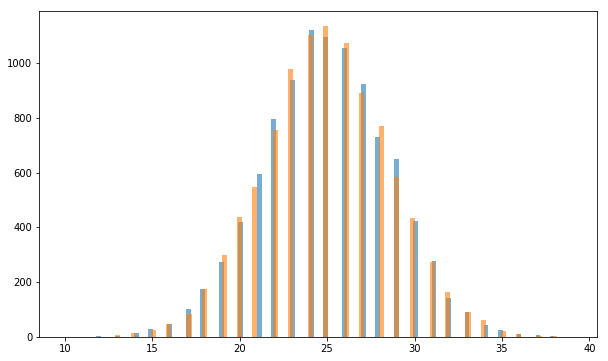

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(num_assigned, alpha=0.6, bins=100)
plt.hist(norm_hist, alpha=0.6, bins=100)
plt.show()

In [ ]:
# compute a matrix of distances in variables for formula
def distances(f, n):
    d = np.zeros((n, n), dtype='int64') + len(f)
    d1 = d.copy()
    return d

In [15]:
distances(f, 10)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])